In [3]:
%pip install pandas
%pip install catboost
%pip install xgboost
%pip install sklearn
%pip install numpy
%pip install matplotlib
%pip install seaborn
%pip install csv
%pip install joblib
%pip install scipy
%pip install h5py scikit-optimize
%pip install optuna



Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip available: 22.2.2 -> 22.3
[notice] To update, run: python.exe -m pip install --upgrade pip


Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip available: 22.2.2 -> 22.3
[notice] To update, run: python.exe -m pip install --upgrade pip


Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip available: 22.2.2 -> 22.3
[notice] To update, run: python.exe -m pip install --upgrade pip


Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip available: 22.2.2 -> 22.3
[notice] To update, run: python.exe -m pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.Defaulting to user installation because normal site-packages is not writeable




[notice] A new release of pip available: 22.2.2 -> 22.3
[notice] To update, run: python.exe -m pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.Defaulting to user installation because normal site-packages is not writeable




[notice] A new release of pip available: 22.2.2 -> 22.3
[notice] To update, run: python.exe -m pip install --upgrade pip


Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip available: 22.2.2 -> 22.3
[notice] To update, run: python.exe -m pip install --upgrade pip


Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


ERROR: Could not find a version that satisfies the requirement csv (from versions: none)
ERROR: No matching distribution found for csv

[notice] A new release of pip available: 22.2.2 -> 22.3
[notice] To update, run: python.exe -m pip install --upgrade pip


Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip available: 22.2.2 -> 22.3
[notice] To update, run: python.exe -m pip install --upgrade pip


Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip available: 22.2.2 -> 22.3
[notice] To update, run: python.exe -m pip install --upgrade pip


Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip available: 22.2.2 -> 22.3
[notice] To update, run: python.exe -m pip install --upgrade pip


Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip available: 22.2.2 -> 22.3
[notice] To update, run: python.exe -m pip install --upgrade pip


In [1]:
import pandas as pd

import seaborn as sns

import csv

import xgboost
from xgboost import XGBClassifier, XGBRFClassifier
from xgboost import plot_tree, plot_importance

import catboost as cb
from catboost import CatBoostError

import joblib

import sklearn
from sklearn.metrics import f1_score
from sklearn import metrics
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import FunctionTransformer
from sklearn.model_selection import KFold
from sklearn import preprocessing
from sklearn.decomposition import PCA
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import SGDClassifier, LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import make_scorer , mean_squared_error, confusion_matrix, accuracy_score, roc_auc_score, roc_curve, classification_report
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import RFE
from sklearn.metrics.pairwise import cosine_similarity

import optuna

%matplotlib inline
import matplotlib.pyplot as plt

import numpy as np

import math

import statistics


c:\Users\DASolodennikov\AppData\Local\Programs\Python\Python310\lib\site-packages\tqdm\auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [5]:
data = joblib.load('catboost_leads.pkl')

df = data.trials_dataframe()
df

,number,value,datetime_start,datetime_complete,duration,params_allow_const_label,params_auto_class_weights,params_bagging_temperature,params_boosting_type,params_depth,...,params_loss_function,params_max_bin,params_min_data_in_leaf,params_model_shrink_mode,params_posterior_sampling,params_reg_lambda,params_rsm,params_sampling_frequency,params_score_function,state
0,0,NaN,2022-10-31 21:30:12.612409,NaT,NaT,True,None,8.809268,Ordered,7,...,Logloss,365,6,NaN,True,7.759734,0.790510,PerTree,Cosine,RUNNING
1,1,0.999688,2022-10-31 21:30:12.615419,2022-10-31 21:34:44.532125,0 days 00:04:31.916706,False,NaN,15.164037,Plain,1,...,CrossEntropy,243,15,NaN,True,7.782886,0.896013,PerTree,Cosine,COMPLETE
2,2,NaN,2022-10-31 21:30:12.616408,NaT,NaT,False,None,3.386458,Plain,11,...,Logloss,489,9,Decreasing,False,6.529588,0.225433,PerTreeLevel,L2,RUNNING
3,3,NaN,2022-10-31 21:30:12.618412,NaT,NaT,True,SqrtBalanced,14.816550,Plain,13,...,Logloss,127,4,NaN,NaN,10.330070,0.656032,PerTreeLevel,L2,RUNNING
4,4,NaN,2022-10-31 21:30:12.620411,NaT,NaT,False,None,15.751194,Ordered,2,...,Logloss,562,9,NaN,NaN,8.498895,0.263213,PerTree,Cosine,RUNNING
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
56,56,0.994348,2022-11-01 03:58:17.707922,2022-11-01 03:58:44.811402,0 days 00:00:27.103480,False,NaN,14.456525,Plain,9,...,CrossEntropy,252,2,NaN,NaN,8.682014,0.003699,PerTree,Cosine,COMPLETE
57,57,0.999858,2022-11-01 03:58:44.823411,2022-11-01 04:08:38.638448,0 days 00:09:53.815037,True,SqrtBalanced,12.279088,Plain,6,...,Logloss,248,15,NaN,True,9.946581,0.489792,PerTree,L2,COMPLETE
58,58,0.999817,2022-11-01 04:00:45.562009,2022-11-01 04:11:21.286856,0 days 00:10:35.724847,False,Balanced,12.186836,Plain,3,...,Logloss,361,14,NaN,NaN,10.018326,0.592282,NaN,L2,COMPLETE
59,59,0.999672,2022-11-01 04:05:08.611834,2022-11-01 04:15:37.649447,0 days 00:10:29.037613,True,None,13.407713,Plain,1,...,Logloss,268,16,NaN,NaN,10.379076,0.473360,PerTree,L2,COMPLETE


In [12]:
optuna.visualization.plot_intermediate_values(data)


[W 2022-11-02 01:04:14,398] You need to set up the pruning feature to utilize `plot_intermediate_values()`


In [6]:
optuna.visualization.plot_optimization_history(data)


In [9]:
fig = optuna.visualization.plot_param_importances(data)
fig.show()

In [151]:
data = joblib.load('catboost_leads_directions.pkl')

df = data.trials_dataframe()
df

,number,values_0,values_1,values_2,values_3,datetime_start,datetime_complete,duration,params_allow_const_label,params_auto_class_weights,...,params_max_bin,params_min_data_in_leaf,params_model_shrink_mode,params_posterior_sampling,params_reg_lambda,params_rsm,params_sampling_frequency,params_score_function,system_attrs_nsga2:generation,state
0,0,NaN,NaN,NaN,NaN,2022-10-31 20:40:33.803250,NaT,NaT,NaN,NaN,...,NaN,6.0,NaN,NaN,NaN,0.928579,NaN,NaN,0,RUNNING
1,1,NaN,NaN,NaN,NaN,2022-10-31 20:40:33.806150,NaT,NaT,NaN,NaN,...,NaN,15.0,NaN,NaN,NaN,0.937689,NaN,NaN,0,RUNNING
2,2,NaN,NaN,NaN,NaN,2022-10-31 20:40:33.808143,NaT,NaT,NaN,NaN,...,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,0,RUNNING
3,3,NaN,NaN,NaN,NaN,2022-10-31 20:40:33.810139,NaT,NaT,NaN,NaN,...,NaN,3.0,NaN,NaN,NaN,NaN,NaN,NaN,0,RUNNING
4,4,NaN,NaN,NaN,NaN,2022-10-31 20:40:33.813134,2022-10-31 20:40:34.566162,0 days 00:00:00.753028,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,FAIL
5,5,NaN,NaN,NaN,NaN,2022-10-31 20:40:33.821154,NaT,NaT,NaN,NaN,...,NaN,7.0,NaN,NaN,NaN,0.084716,NaN,NaN,0,RUNNING
6,6,NaN,NaN,NaN,NaN,2022-10-31 20:40:33.825140,NaT,NaT,NaN,NaN,...,NaN,6.0,NaN,NaN,NaN,NaN,NaN,NaN,0,RUNNING
7,7,NaN,NaN,NaN,NaN,2022-10-31 20:40:33.838153,NaT,NaT,NaN,NaN,...,NaN,11.0,NaN,NaN,NaN,NaN,NaN,NaN,0,RUNNING
8,8,NaN,NaN,NaN,NaN,2022-10-31 20:40:33.854145,NaT,NaT,NaN,NaN,...,NaN,16.0,NaN,NaN,NaN,NaN,NaN,NaN,0,RUNNING
9,9,NaN,NaN,NaN,NaN,2022-10-31 20:40:33.870142,NaT,NaT,NaN,NaN,...,NaN,7.0,NaN,NaN,NaN,NaN,NaN,NaN,0,RUNNING


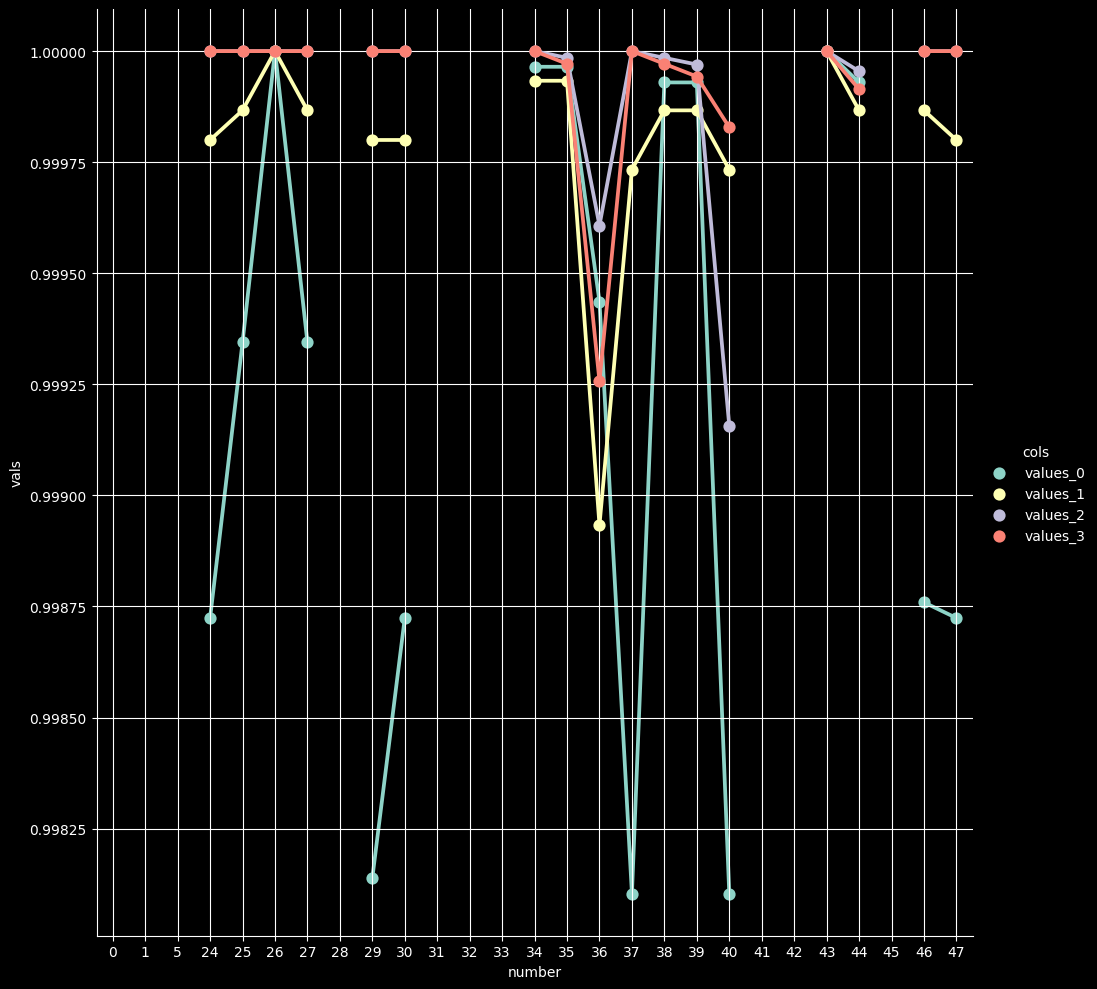

In [166]:
dfm = df.dropna(thresh=10).iloc[:,:5].melt('number', var_name='cols', value_name='vals')
g = sns.catplot(x="number", y="vals", hue='cols', data=dfm, kind='point' , height=10)
plt.grid() 
plt.show()

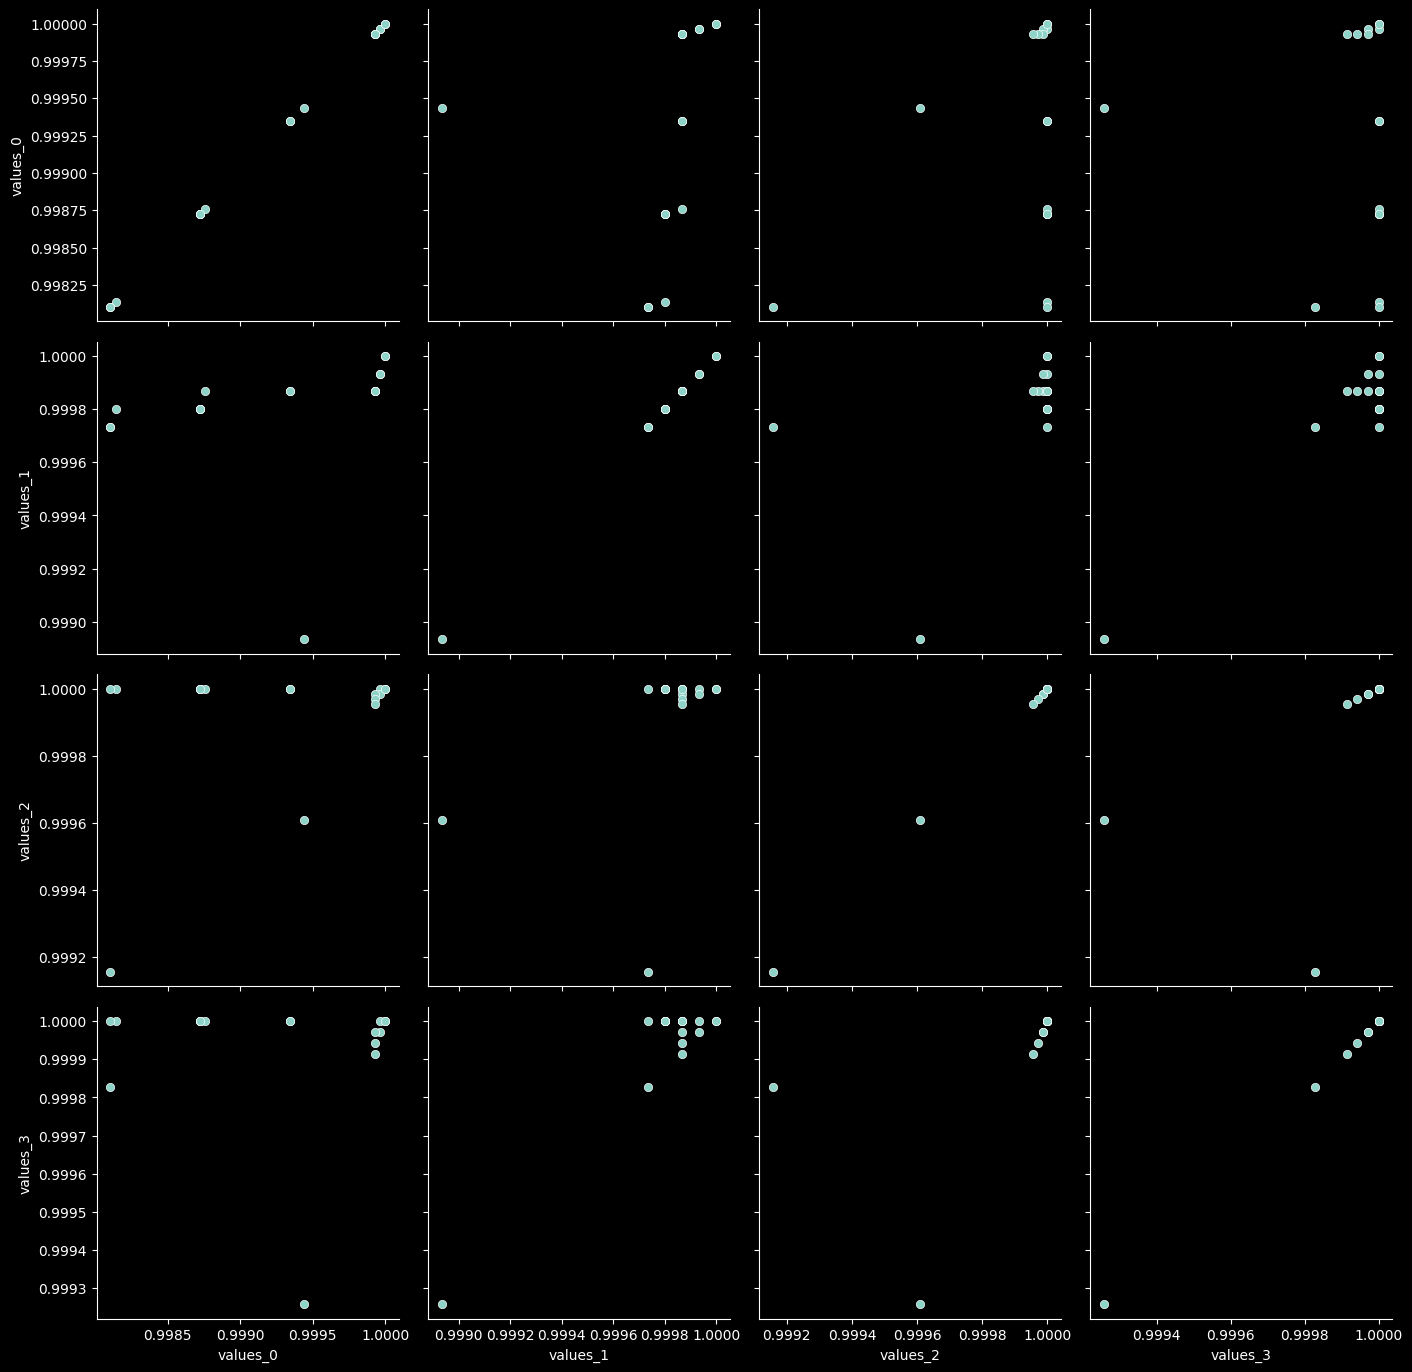

In [168]:
cols = ['values_0',	'values_1',	'values_2',	'values_3']
g = sns.PairGrid(df[cols], height=3.5)
g.map(sns.scatterplot)

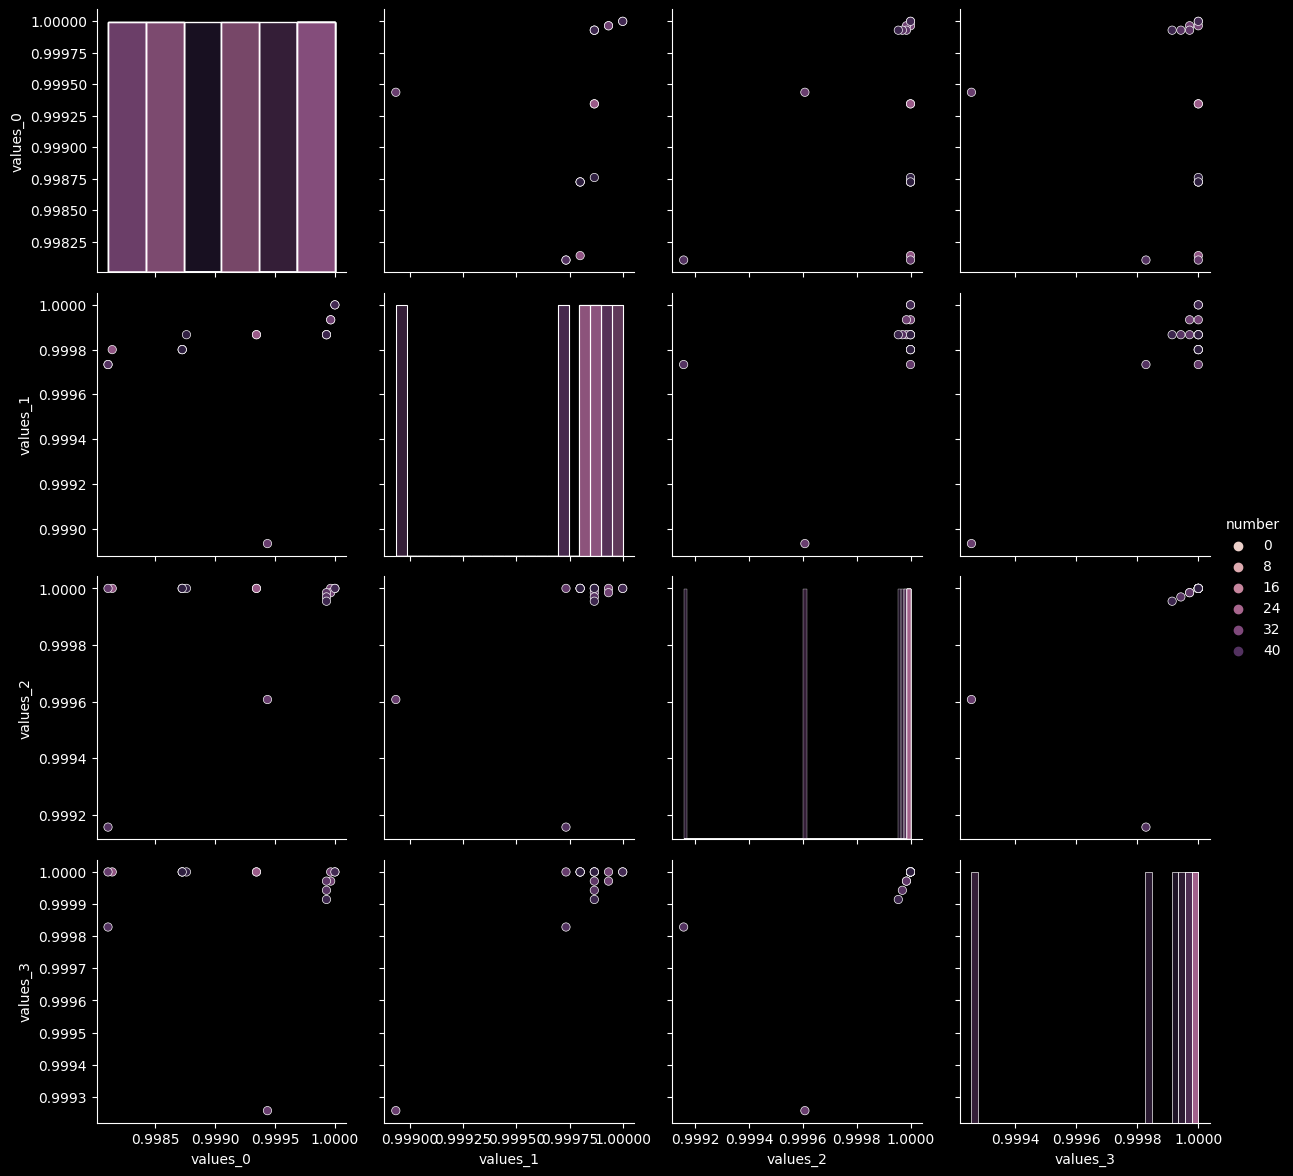

In [172]:
g = sns.PairGrid(df, vars=cols, hue='number', height=3)
g.map_diag(sns.histplot)
g.map_offdiag(sns.scatterplot)
g.add_legend()

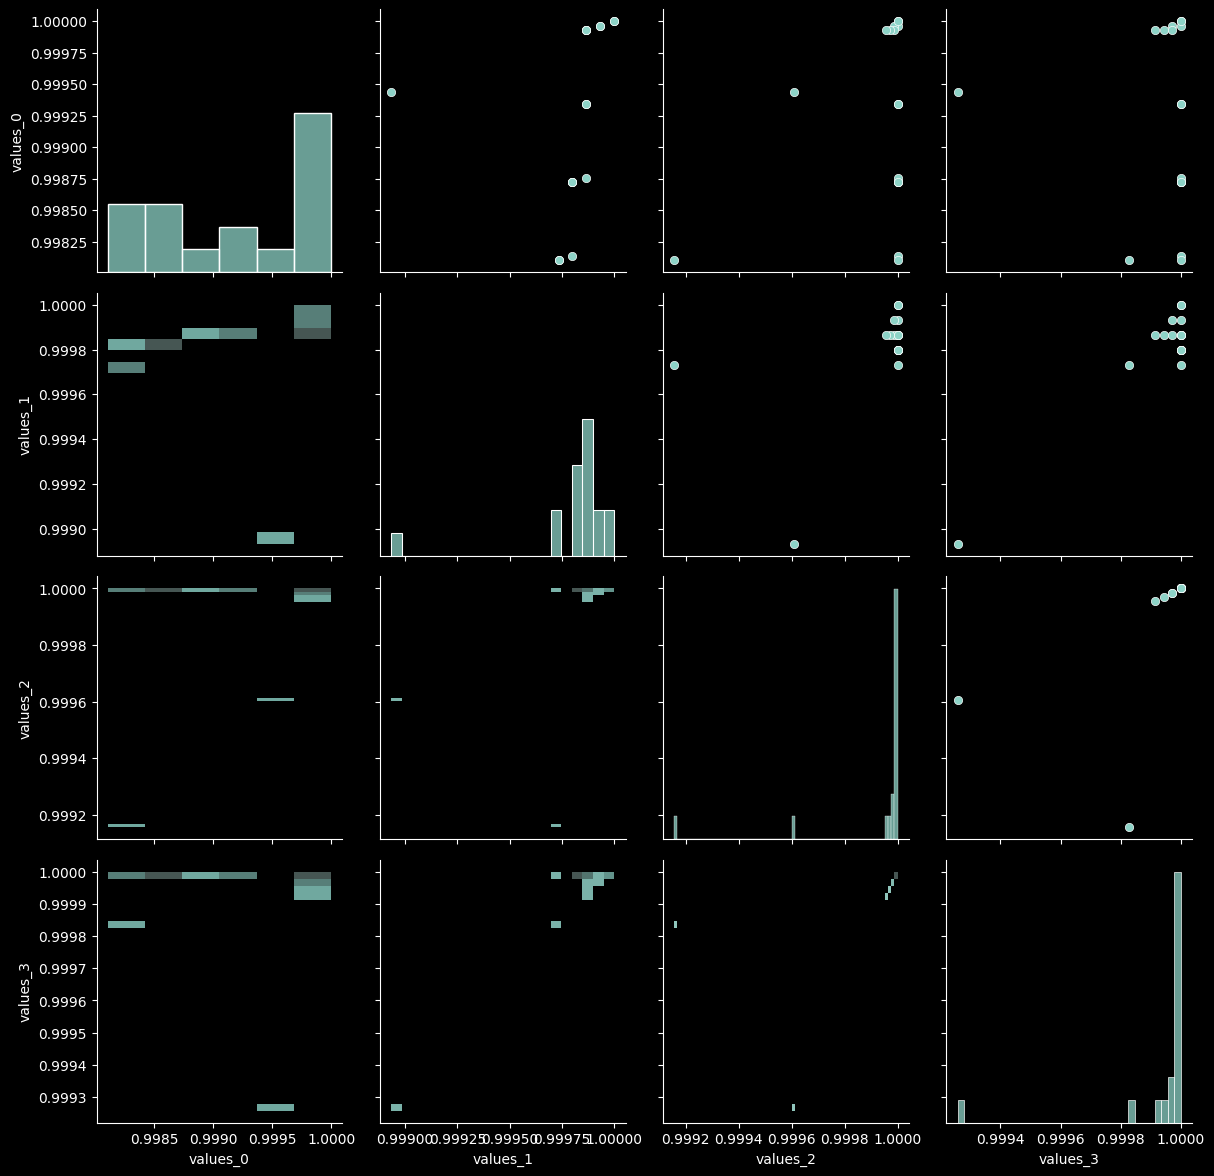

In [174]:
g = sns.PairGrid(df.dropna(thresh=10), vars=cols, height=3)
g.map_diag(sns.histplot)
g.map_upper(sns.scatterplot)
g.map_lower(sns.histplot)

<AxesSubplot: xlabel='number'>

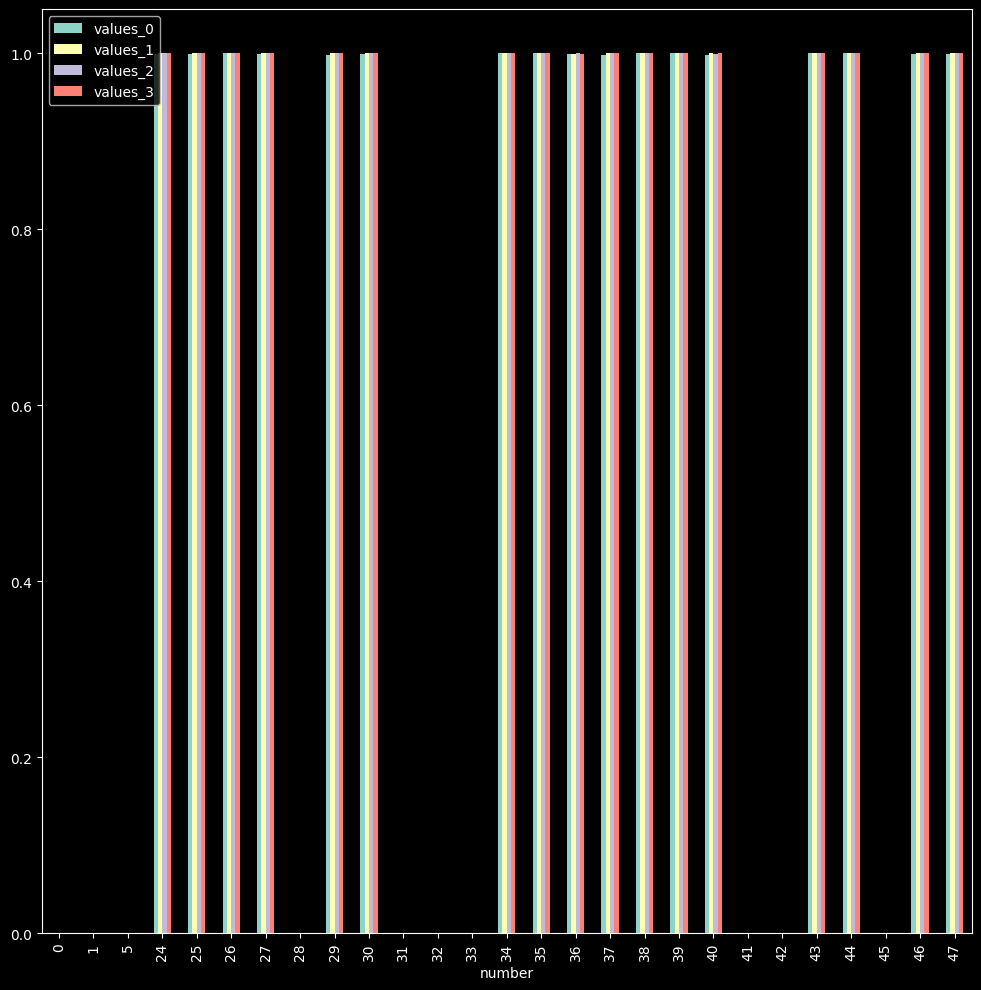

In [137]:
df.dropna(thresh=10).plot(x="number", y=['values_0',	'values_1',	'values_2',	'values_3'], kind="bar" , figsize=(12, 12))


In [116]:
optuna.visualization.plot_param_importances(data, target=lambda t: t.values[0])


C:\Users\dasolodennikov\AppData\Roaming\Python\Python310\site-packages\optuna\visualization\_utils.py:69: UserWarning:

`target` is specified, but `target_name` is the default value, 'Objective Value'.



In [117]:
optuna.visualization.plot_edf(data, target=lambda t: t.values[0])

C:\Users\dasolodennikov\AppData\Roaming\Python\Python310\site-packages\optuna\visualization\_utils.py:69: UserWarning:

`target` is specified, but `target_name` is the default value, 'Objective Value'.



In [118]:
optuna.visualization.plot_param_importances(
    data, target=lambda t: t.duration.total_seconds(), target_name="duration"
)

In [119]:
optuna.visualization.plot_slice(data, target=lambda t: t.values[0])



C:\Users\dasolodennikov\AppData\Roaming\Python\Python310\site-packages\optuna\visualization\_utils.py:69: UserWarning:

`target` is specified, but `target_name` is the default value, 'Objective Value'.



In [120]:
optuna.visualization.plot_intermediate_values(data)


[W 2022-11-01 04:16:12,902] You need to set up the pruning feature to utilize `plot_intermediate_values()`


In [87]:
optuna.visualization.plot_pareto_front(data, target_names=["values_0", "values_1"])
#values_0	values_1	values_2	values_3

ValueError: `plot_pareto_front` function only supports 2 or 3 objective studies when using `targets` is `None`. Please use `targets` if your objective studies have more than 3 objectives.